<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [9]:
# Load CSV dataset
data = pd.read_csv("DMV_Written_Tests.csv")

# View first few rows
data.head()


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

/tmp/ipython-input-2876460280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Results", data=data, palette="bwr")


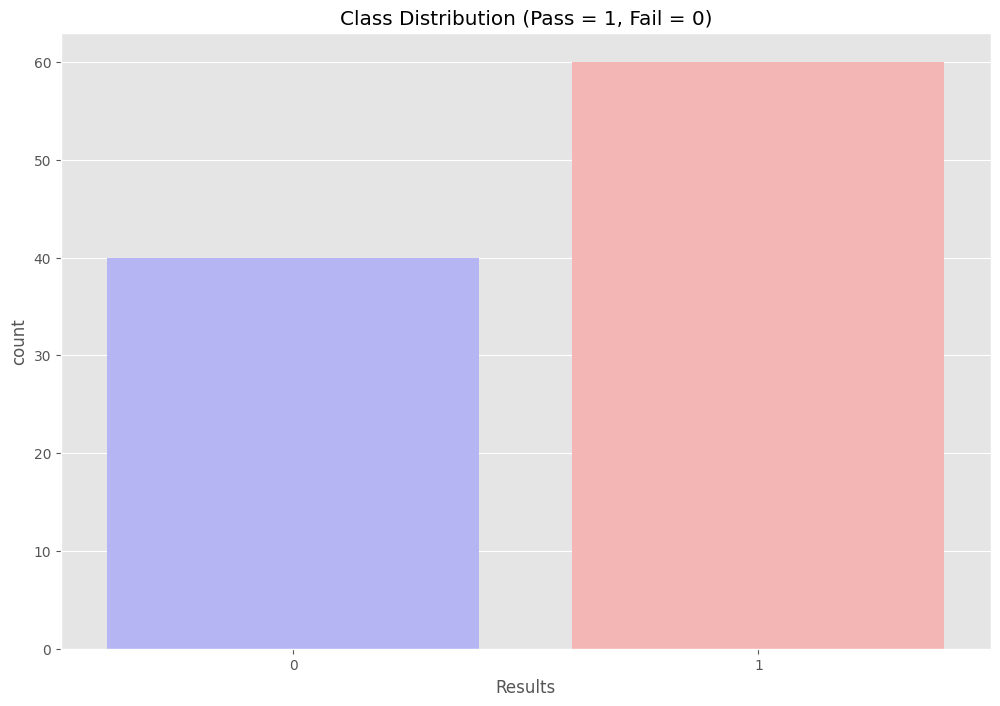

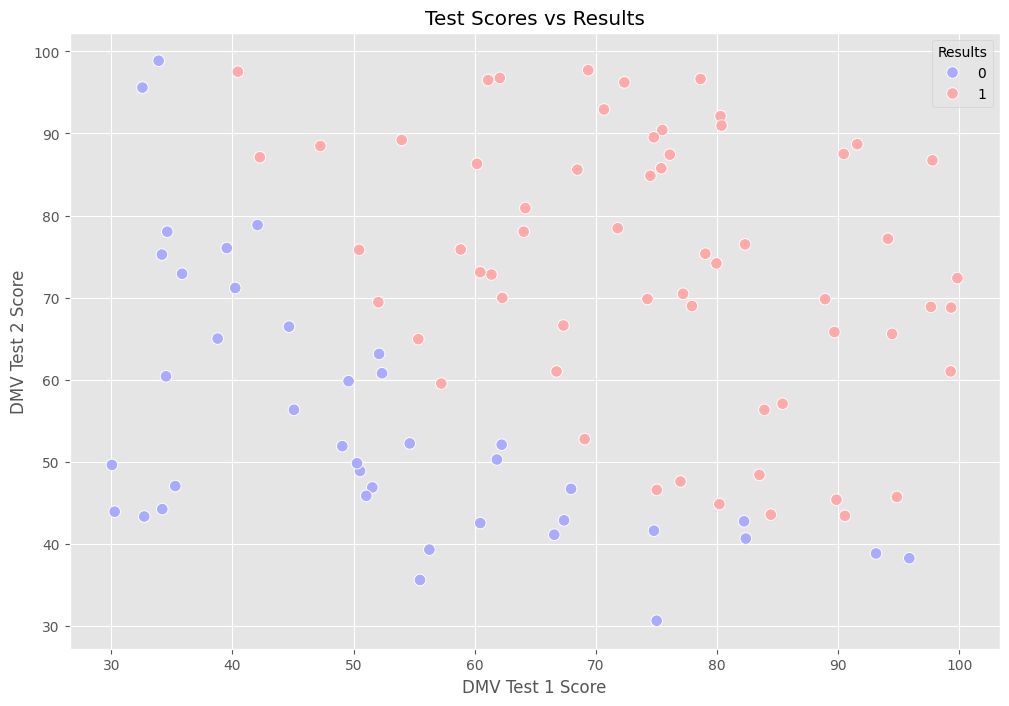

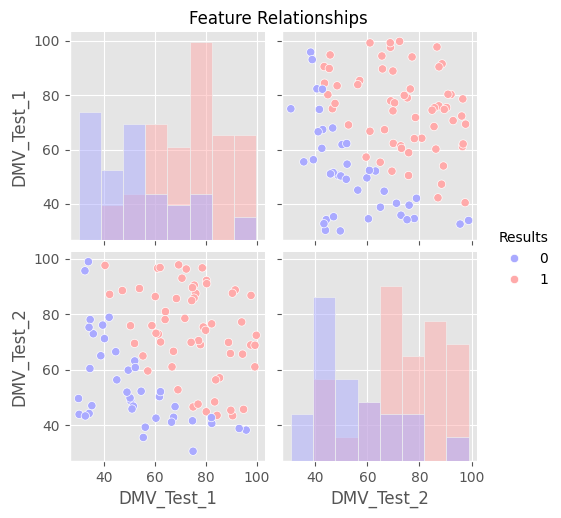

In [10]:
# Check class distribution
sns.countplot(x="Results", data=data, palette="bwr")
plt.title("Class Distribution (Pass = 1, Fail = 0)")
plt.show()

# Scatter plot of DMV_Test_1 vs DMV_Test_2
sns.scatterplot(
    x="DMV_Test_1",
    y="DMV_Test_2",
    hue="Results",
    data=data,
    palette="bwr",
    s=70
)
plt.title("Test Scores vs Results")
plt.xlabel("DMV Test 1 Score")
plt.ylabel("DMV Test 2 Score")
plt.show()

# Pairplot for feature relationships
sns.pairplot(data, hue="Results", diag_kind="hist", palette="bwr")
plt.suptitle("Feature Relationships", y=1.02)
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [11]:
# Define the logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Test the function with a few values
test_values = [-10, -1, 0, 1, 10]
for val in test_values:
    print(f"sigmoid({val}) = {sigmoid(val)}")


sigmoid(-10) = 4.5397868702434395e-05
sigmoid(-1) = 0.2689414213699951
sigmoid(0) = 0.5
sigmoid(1) = 0.7310585786300049
sigmoid(10) = 0.9999546021312976


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [12]:
# Prepare feature matrix X (with intercept) and target y
X = data[["DMV_Test_1", "DMV_Test_2"]].values
y = data["Results"].values.reshape(-1, 1)

# Add intercept term (column of ones)
m = X.shape[0]
X_b = np.c_[np.ones((m, 1)), X]  # shape: (m, n+1)

# Sigmoid from Task 4 is reused
# def sigmoid(z): return 1 / (1 + np.exp(-z))

def compute_cost(theta, X, y, lambda_=0.0):
    """
    Logistic regression cost with optional L2 regularization.
    theta: (n+1, 1)
    X: (m, n+1) with intercept
    y: (m, 1)
    """
    m = X.shape[0]
    theta = theta.reshape(-1, 1)  # ensure column vector
    z = X @ theta
    # Numerically stable log-likelihood using clipping
    h = sigmoid(z)
    eps = 1e-12
    h = np.clip(h, eps, 1 - eps)

    # Unregularized cost
    cost = (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))

    # L2 regularization (exclude theta[0])
    reg = (lambda_ / (2*m)) * np.sum(theta[1:] ** 2)
    return float(cost + reg)

def compute_gradient(theta, X, y, lambda_=0.0):
    """
    Gradient of logistic regression cost with optional L2 regularization.
    Returns gradient as a flattened array (n+1,)
    """
    m = X.shape[0]
    theta = theta.reshape(-1, 1)
    z = X @ theta
    h = sigmoid(z)

    # Unregularized gradient
    grad = (1/m) * (X.T @ (h - y))  # shape: (n+1, 1)

    # Regularization (exclude bias term)
    reg = (lambda_ / m) * theta
    reg[0] = 0.0
    grad = grad + reg

    return grad.ravel()

# ---- Quick sanity check with zeros initialization ----
initial_theta = np.zeros((X_b.shape[1], 1))   # (n+1, 1)
J = compute_cost(initial_theta, X_b, y, lambda_=0.0)
grad = compute_gradient(initial_theta, X_b, y, lambda_=0.0)

print("Initial cost (no regularization):", J)
print("Initial gradient:", grad)


Initial cost (no regularization): 0.6931471805599453
Initial gradient: [ -0.1        -12.00921659 -11.26284221]


/tmp/ipython-input-269969054.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(cost + reg)


### Task 6: Cost and Gradient at Initialization
---

In [13]:
# ---------------------------
# Task 6: Cost and Gradient at Initialization
# ---------------------------

# Ensure compute_cost and compute_gradient (and sigmoid) are already defined
# Also ensure X_b and y are prepared (X_b has intercept column)

# Initialize theta to zeros (n+1, 1)
initial_theta = np.zeros((X_b.shape[1], 1))

# Compute cost (use .item() to avoid DeprecationWarning when converting 1x1 arrays)
initial_cost = compute_cost(initial_theta, X_b, y, lambda_=0.0)
# if compute_cost returns a numpy array or 1x1 array, .item() will safely extract scalar
if hasattr(initial_cost, "item"):
    initial_cost = initial_cost.item()

initial_grad = compute_gradient(initial_theta, X_b, y, lambda_=0.0)

# Print results clearly
print("Task 6: Cost & Gradient at Initialization")
print("----------------------------------------")
print(f"Initial cost (no regularization): {initial_cost:.12f}")
print("Initial gradient (shape {}):".format(initial_grad.shape))
print(initial_grad)
print(f"Gradient L2 norm: {np.linalg.norm(initial_grad):.6f}")

# Quick sanity checks
assert np.isscalar(initial_cost), "Initial cost should be a scalar"
assert initial_grad.shape == (X_b.shape[1],), f"Gradient shape should be {(X_b.shape[1],)}"

# Optional: see effect of a small L2 regularization (lambda_=1.0)
reg_cost = compute_cost(initial_theta, X_b, y, lambda_=1.0)
if hasattr(reg_cost, "item"):
    reg_cost = reg_cost.item()
reg_grad = compute_gradient(initial_theta, X_b, y, lambda_=1.0)

print("\nWith L2 regularization (lambda = 1.0):")
print(f"Cost: {reg_cost:.12f}")
print("Gradient:", reg_grad)


Task 6: Cost & Gradient at Initialization
----------------------------------------
Initial cost (no regularization): 0.693147180560
Initial gradient (shape (3,)):
[ -0.1        -12.00921659 -11.26284221]
Gradient L2 norm: 16.464595

With L2 regularization (lambda = 1.0):
Cost: 0.693147180560
Gradient: [ -0.1        -12.00921659 -11.26284221]


/tmp/ipython-input-269969054.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(cost + reg)


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

/tmp/ipython-input-269969054.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(cost + reg)


Optimized θ: [-4.81180027  0.04528064  0.03819149]
Final cost: 0.38738952271118815


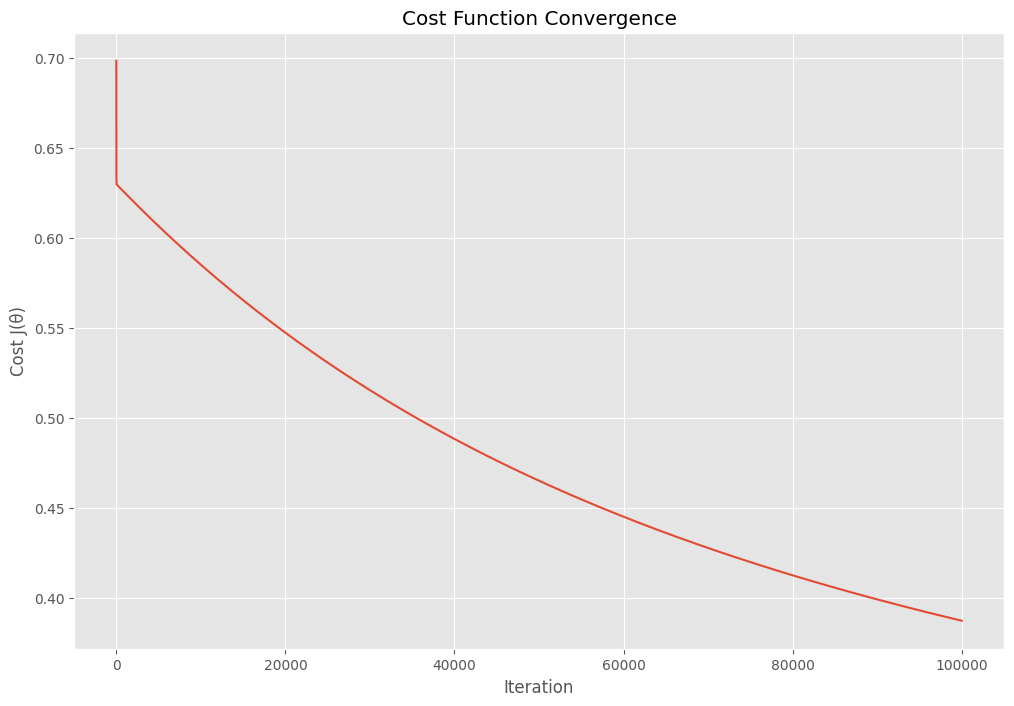

In [14]:
# ---------------------------
# Task 7: Gradient Descent
# ---------------------------

def gradient_descent(X, y, alpha=0.001, num_iters=100000, lambda_=0.0, tol=1e-6):
    """
    Perform gradient descent to minimize logistic regression cost.
    X: feature matrix with intercept (m, n+1)
    y: target vector (m, 1)
    alpha: learning rate
    num_iters: maximum number of iterations
    lambda_: regularization strength (default 0)
    tol: tolerance for convergence (based on cost change)
    """
    m, n = X.shape
    theta = np.zeros((n, 1))  # initialize parameters
    cost_history = []

    for i in range(num_iters):
        grad = compute_gradient(theta, X, y, lambda_=lambda_).reshape(-1, 1)
        theta = theta - alpha * grad

        cost = compute_cost(theta, X, y, lambda_=lambda_)
        if hasattr(cost, "item"):  # safe scalar conversion
            cost = cost.item()
        cost_history.append(cost)

        # Check convergence
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < tol:
            print(f"Converged after {i} iterations.")
            break

    return theta, cost_history

# Run gradient descent
alpha = 0.001      # learning rate (tune if needed)
num_iters = 100000
theta_opt, cost_history = gradient_descent(X_b, y, alpha=alpha, num_iters=num_iters)

# Results
print("Optimized θ:", theta_opt.ravel())
print("Final cost:", cost_history[-1])

# Plot cost over iterations
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("Cost Function Convergence")
plt.show()


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

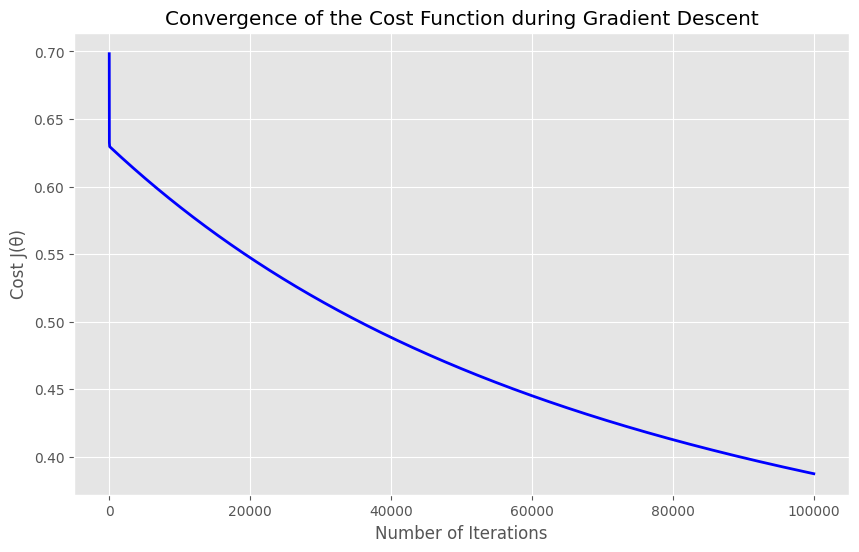

In [15]:
# ---------------------------
# Task 8: Plotting the Convergence of J(θ)
# ---------------------------

plt.figure(figsize=(10,6))
plt.plot(range(len(cost_history)), cost_history, color="blue", linewidth=2)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost J(θ)")
plt.title("Convergence of the Cost Function during Gradient Descent")
plt.grid(True)
plt.show()


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

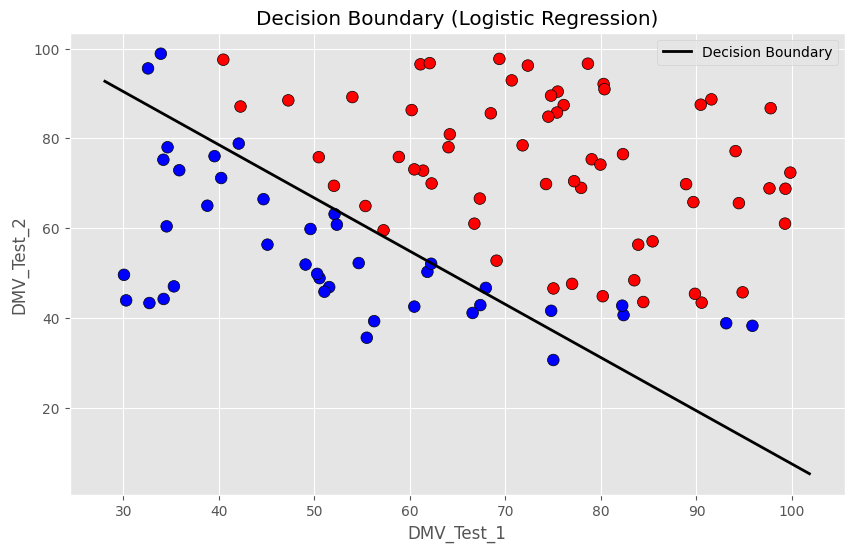

In [16]:
# ---------------------------
# Task 9: Plotting the Decision Boundary
# ---------------------------

def plot_decision_boundary(theta, X, y):
    """
    Plot data points and the decision boundary defined by theta.
    Assumes X includes intercept term in column 0.
    """
    # Scatter plot of dataset
    plt.figure(figsize=(10,6))
    plt.scatter(X[:,1], X[:,2], c=y.ravel(), cmap="bwr", edgecolor="k", s=70)
    plt.xlabel("DMV_Test_1")
    plt.ylabel("DMV_Test_2")
    plt.title("Decision Boundary (Logistic Regression)")

    # Decision boundary line: x2 = -(θ0 + θ1*x1)/θ2
    x_vals = np.linspace(X[:,1].min()-2, X[:,1].max()+2, 100)
    y_vals = -(theta[0] + theta[1]*x_vals) / theta[2]
    plt.plot(x_vals, y_vals, color="black", linewidth=2, label="Decision Boundary")

    plt.legend()
    plt.show()

# Plot with optimized theta
plot_decision_boundary(theta_opt, X_b, y)


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [19]:
# ---------------------------
# Task 10: Predictions
# ---------------------------

def predict(theta, X):
    """
    Predict class (0 or 1) using learned logistic regression parameters.
    Returns array of predictions.
    """
    probability = sigmoid(X.dot(theta))
    return (probability >= 0.5).astype(int), probability

# Example new student's DMV test scores
new_student = np.array([1, 45, 85])   # 1 = intercept, Test1=45, Test2=85
pred_class, prob = predict(theta_opt, new_student)

print(f"Prediction for student with scores (45, 85): {pred_class[0]} "
      f"with probability {prob[0]:.4f}")


Prediction for student with scores (45, 85): 1 with probability 0.6159
